In [243]:
%matplotlib inline

import sklearn
import pandas
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [244]:
wines = pandas.DataFrame([
    # Bordeaux
    {
        "name": "Haut Brion",
        "area": "Bordeaux",
        "lwin": 1011247
    },
    {
        "name": "Lafite Rothschild",
        "area": "Bordeaux",
        "lwin": 1011872
    },
    {
        "name": "Latour",
        "area": "Bordeaux",
        "lwin": 1012316
    },
    {
        "name": "Margaux",
        "area": "Bordeaux",
        "lwin": 1012781
    },
    {
        "name": "Mouton Rothschild",
        "area": "Bordeaux",
        "lwin": 1013544
    },
    # Burgundy
    {
        "name": "Rousseau, Chambertin",
        "area": "Burgundy",
        "lwin": 1057005
    },
    {
        "name": "Vogue, Musigny Vv",
        "area": "Burgundy",
        "lwin": 1026872
    },
    {
        "name": "Grivot, Clos Vougeot",
        "area": "Burgundy",
        "lwin": 1035580
    },
    {
        "name": "Lambrays, Clos Lambrays",
        "area": "Burgundy",
        "lwin": 1040290
    },
    {
        "name": "Ponsot, Clos Roche Vv",
        "area": "Burgundy",
        "lwin": 1051508
    },
    # Southern Rhone
    {
        "name": "Beaucastel, Chateauneuf Du Pape",
        "area": "Southern Rhone",
        "lwin": 1108387
    },
    {
        "name": "Clos Papes, Chateauneuf Du Pape",
        "area": "Southern Rhone",
        "lwin": 1110487
    },
    {
        "name": "Janasse, Chateauneuf Du Pape Vv",
        "area": "Southern Rhone",
        "lwin": 1113970
    },
    {
        "name": "Pegau, Chateauneuf Du Pape Reservee",
        "area": "Southern Rhone",
        "lwin": 1115118
    },
    {
        "name": "Vieux Telegraphe, Chateauneuf Du Pape",
        "area": "Southern Rhone",
        "lwin": 1118076
    },
    # Northern Rhone
    {
        "name": "Chapoutier, Ermitage Pavillon",
        "area": "Northern Rhone",
        "lwin": 1109704
    },
    {
        "name": "Domaine Jean Louis Chave, Hermitage",
        "area": "Northern Rhone",
        "lwin": 1110012
    },
    {
        "name": "Guigal, Cotes Du Rhone",
        "area": "Northern Rhone",
        "lwin": 1113101
    },
    {
        "name": "Jaboulet, Hermitage Chapelle",
        "area": "Northern Rhone",
        "lwin": 1113563
    },
    {
        "name": "Cote Rotie Ampuis",
        "area": "Northern Rhone",
        "lwin": 1113172
    }
]).set_index("lwin")

In [268]:
ratings = pandas.read_csv("/vagrant/reviews.csv").set_index("lwin")
ratings["year"] = [datetime.datetime.strptime(str(dt), "%Y").year for dt in ratings["year"]]
ratings = ratings.join(wines["area"]).set_index("year")

market = pandas.read_csv("/vagrant/msci_index.csv")
market["date"] = [datetime.datetime.strptime(dt, "%Y-%m-%d") for dt in market["date"]]
market = market.set_index("date")

market = pandas.groupby(market, market.index.year).sum()
market_ratings = ratings.join(market["price"], rsuffix="_msci")

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


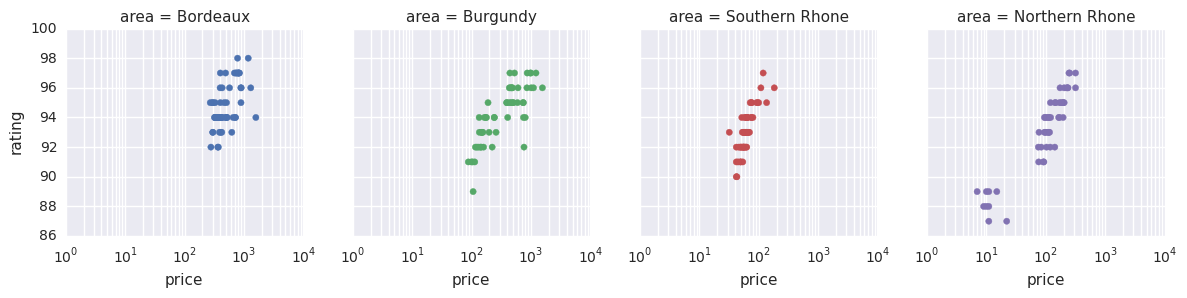

In [279]:
g = sns.FacetGrid(market_ratings, col="area", hue="area")
g.map(plt.scatter, "price", "rating")
g.set(xscale="log")

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


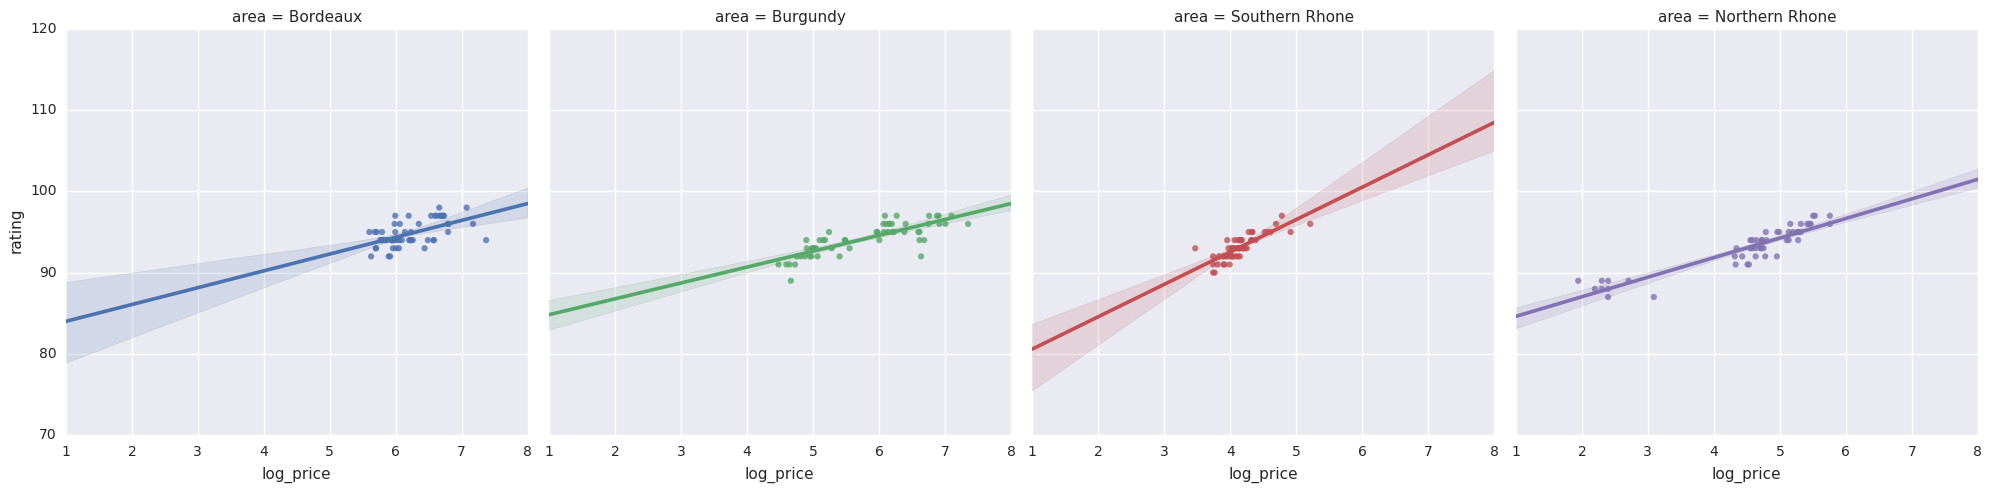

In [283]:
market_ratings["log_price"] = np.log(market_ratings["price"])
sns.lmplot(x="log_price", y="rating", col="area", hue="area", data=market_ratings, fit_reg=True, legend=True)

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


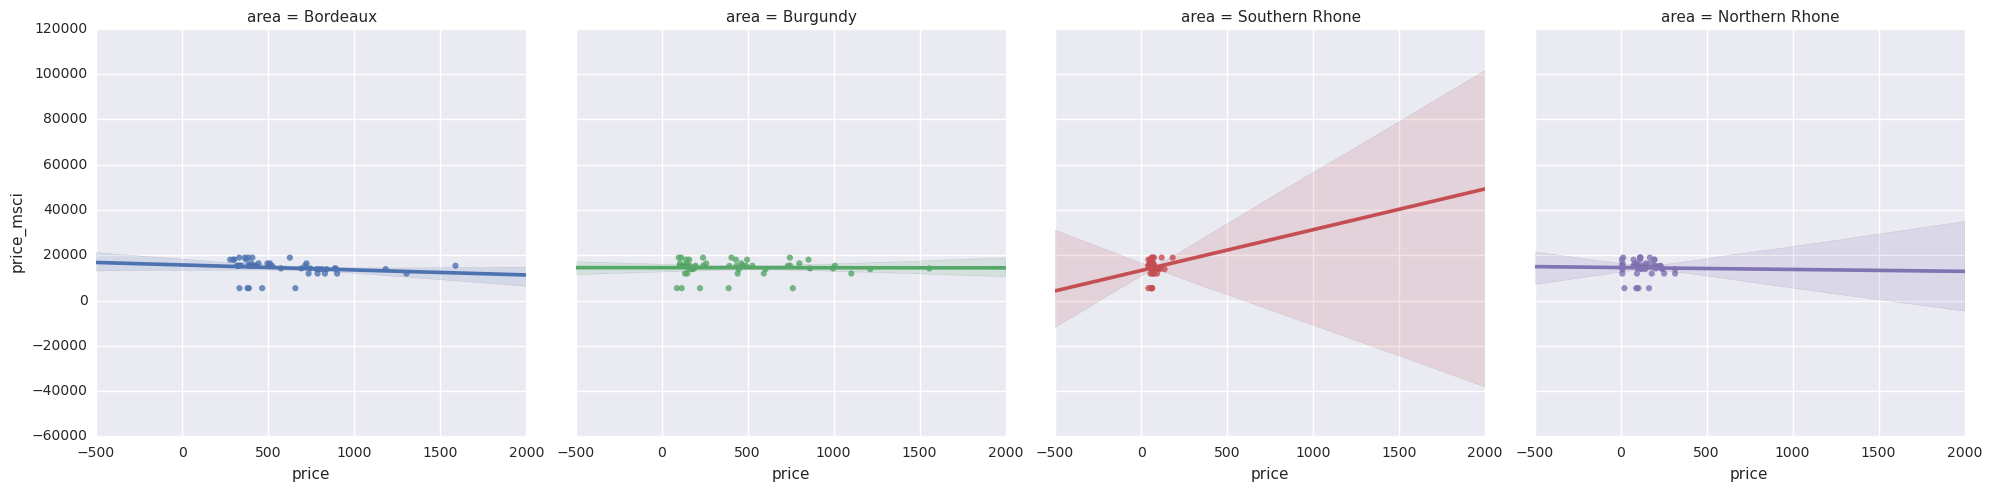

In [284]:
sns.lmplot(x="price", y="price_msci", col="area", hue="area", data=market_ratings, fit_reg=True)

In [293]:
area = market_ratings[market_ratings["area"] == "Burgundy"]
sm.ols(formula="log_price ~ rating", data=area).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     100.7
Date:                Wed, 14 Dec 2016   Prob (F-statistic):           7.45e-14
Time:                        18:19:18   Log-Likelihood:                -36.214
No. Observations:                  55   AIC:                             76.43
Df Residuals:                      53   BIC:                             80.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -25.8133      3.148     -8.199      0.000       -32.128   -19.499
rating         0.3355      0.033     10.035      0.000         0.268     0.403
==============================================================================
Omnibus:                       10.411   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.239
Skew:                           0.891   Prob(JB):                      0.00598
Kurtosis:                       4.138   Cond. No.                     4.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""